<h3>Omicron Sentiment Analysis</h3>

Te WHO designated a new variant of the coronavirus, B.1.1.529, as a variant of concern which has been named Omicron. Right after that, we saw an outbreak of tweets about the Omicron variant on Twitter.We can analyze the sentiments of the tweets about the Omicron variant through the task of Omicron Sentiment Analysis using Python.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [18]:
data = pd.read_csv("archive/omicron.csv")
data.shape

(17046, 16)

In [19]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False


In [20]:
# let's look at the datatypes present
data.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [21]:
# descriptive statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,17046.0,NaN,NaN,NaN,1495141964613429504.0,2730418633397931.0,1491238327001190400.0,1493522553155964928.0,1494417644541380608.0,1496529739015753728.0,1501284120021843968.0
user_name,17046,6012,Nathan Joyner,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_location,13434,2474,"Los Angeles, CA",2658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_description,15716,5563,Global Venture Captial and Private Equity/Busi...,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_created,17046,5959,2015-05-18 20:52:29,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_followers,17046.0,NaN,NaN,NaN,78319.403144,666627.997637,0.0,57.0,580.5,4431.75,16784537.0
user_friends,17046.0,NaN,NaN,NaN,2471.42444,10743.892237,0.0,17.0,315.0,1489.75,386478.0
user_favourites,17046.0,NaN,NaN,NaN,15708.028511,47682.577019,0.0,239.0,818.0,8776.5,1023752.0
user_verified,17046,2,False,15220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,17046,16839,2022-02-09 13:00:17,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# concise info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17046 entries, 0 to 17045
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17046 non-null  int64 
 1   user_name         17046 non-null  object
 2   user_location     13434 non-null  object
 3   user_description  15716 non-null  object
 4   user_created      17046 non-null  object
 5   user_followers    17046 non-null  int64 
 6   user_friends      17046 non-null  int64 
 7   user_favourites   17046 non-null  int64 
 8   user_verified     17046 non-null  bool  
 9   date              17046 non-null  object
 10  text              17046 non-null  object
 11  hashtags          10219 non-null  object
 12  source            17046 non-null  object
 13  retweets          17046 non-null  int64 
 14  favorites         17046 non-null  int64 
 15  is_retweet        17046 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.9+ MB


In [23]:
# check for null/missing values
data.isnull().sum()

id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

The dataset contains null values in three columns that contains textual data, I will remove all the rows containing the null values:

In [24]:
data = data.dropna()
data.shape

(7575, 16)

The text column in the dataset contains the tweets done by people to share their opinions about the Omicron variant. To move further, we need to clean and prepare this column for the task of sentiment analysis. 

In [25]:
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

 - <b>Lowercasing:</b> text = str(text).lower() converts the input text to lowercase.

 - <b>Removing Square Brackets Content:</b> text = re.sub('\[.*?\]', '', text) uses regular expression to remove any content within square brackets.

 - <b>Removing URLs:</b> text = re.sub('https?://\S+|www\.\S+', '', text) removes URLs starting with 'http', 'https', or 'www'.

 - <b>Removing HTML Tags:</b> text = re.sub('<.*?>+', '', text) removes any HTML tags.

 - <b>Removing Punctuation:</b> text = re.sub('[%s]' % re.escape(string.punctuation), '', text) removes any punctuation characters from the text using the string.punctuation list and the re.escape() function to ensure proper handling of special characters.

 - <b>Removing Newlines:</b> text = re.sub('\n', '', text) removes newline characters.

 - <b>Removing Alphanumeric Characters:</b> text = re.sub('\w*\d\w*', '', text) removes any alphanumeric characters.

 - <b>Removing Stopwords:</b> text = [word for word in text.split(' ') if word not in stopword] removes common stopwords (like 'and', 'the', 'is', etc.) from the text.
   
 - <b>Stemming:</b> text = [stemmer.stem(word) for word in text.split(' ')] stems each word in the text using a stemming algorithm.

 - <b>Joining Text:</b> text=" ".join(text) joins the list of words back into a single string.

Finally, the cleaned text is returned.

In [27]:
data["text"] = data["text"].apply(clean)

As we have cleaned the text column, now let’s have a look at the word cloud of the text column to look at the most number of words used by the people on their tweets:

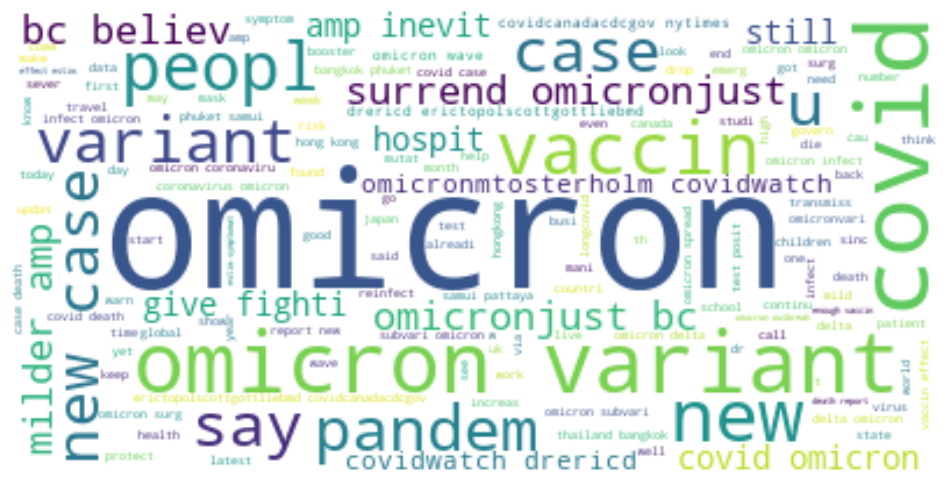

In [29]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the word cloud of the hashtags column to look at the most number of hashtags used by the people on their tweets:

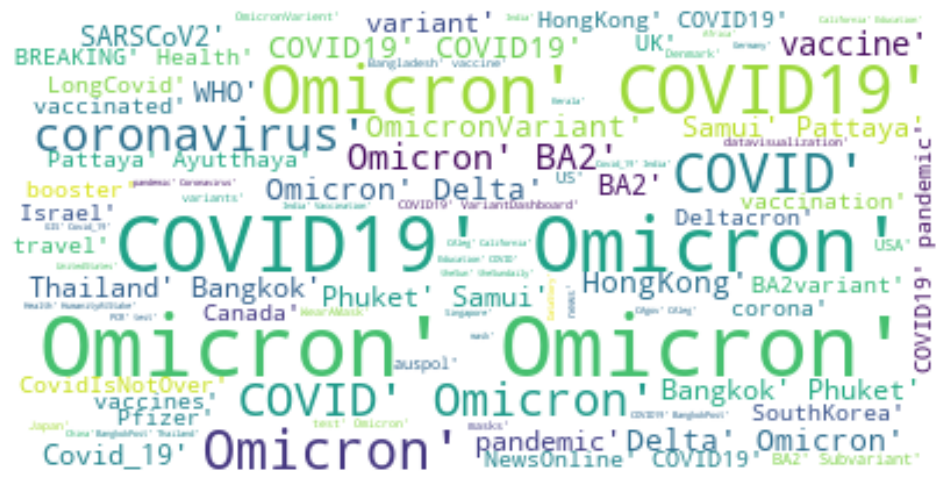

In [31]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's calculate the sentiment scores of the tweets about the Omicron variant. Here I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the text column:

In [32]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,Positive,Negative,Neutral
1,yaschamounk cdc say number fulli vaccin omicro...,0.126,0.0,0.874
4,winterolymp alreadi underway us olympian look...,0.000,0.0,1.000
5,doctor help discov omicron say pressur reveal ...,0.213,0.0,0.787
8,month tonga final singl doubl tappeda sickn...,0.000,0.0,1.000
11,covid pandem continu ukrain case rapid rise du...,0.000,0.0,1.000


Now let’s see how most of the people reacted about the Omicron variant:

In [33]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So most of the opinions were Neutral, which means that people were sharing information about the Omicron variant instead of sharing any positive or negative opinions.